The dataset that this notebook is based in is about **TED talks** history. The rows are all the TED talks that have been delivered since the format was created. There are several questions that I asked to the data out of curiosity that allow one to get to know some interesting details about the talks, and most important of all, to keep practicing with pandas.

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import time
import seaborn as sns
%matplotlib inline
from scipy import stats as ss
import ast

In [47]:
ted = pd.read_csv("../data/ted.csv")

In [3]:
ted.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


## 1a. Which TED talks provoke the most online discussion?

In [4]:
ted.sort_values(by="comments", ascending=False).head(10)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
96,6404,Richard Dawkins urges all atheists to openly s...,1750,TED2002,1012608000,42,Richard Dawkins,Richard Dawkins: Militant atheism,1,1176689220,"[{'id': 3, 'name': 'Courageous', 'count': 3236...","[{'id': 86, 'hero': 'https://pe.tedcdn.com/ima...",Evolutionary biologist,"['God', 'atheism', 'culture', 'religion', 'sci...",Militant atheism,https://www.ted.com/talks/richard_dawkins_on_m...,4374792
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
644,3356,"Questions of good and evil, right and wrong ar...",1386,TED2010,1265846400,39,Sam Harris,Sam Harris: Science can answer moral questions,1,1269249180,"[{'id': 8, 'name': 'Informative', 'count': 923...","[{'id': 666, 'hero': 'https://pe.tedcdn.com/im...","Neuroscientist, philosopher","['culture', 'evolutionary psychology', 'global...",Science can answer moral questions,https://www.ted.com/talks/sam_harris_science_c...,3433437
201,2877,Jill Bolte Taylor got a research opportunity f...,1099,TED2008,1204070400,49,Jill Bolte Taylor,Jill Bolte Taylor: My stroke of insight,1,1205284200,"[{'id': 22, 'name': 'Fascinating', 'count': 14...","[{'id': 184, 'hero': 'https://pe.tedcdn.com/im...",Neuroanatomist,"['biology', 'brain', 'consciousness', 'global ...",My stroke of insight,https://www.ted.com/talks/jill_bolte_taylor_s_...,21190883
1787,2673,Our consciousness is a fundamental aspect of o...,1117,TED2014,1395100800,33,David Chalmers,David Chalmers: How do you explain consciousness?,1,1405350484,"[{'id': 25, 'name': 'OK', 'count': 280}, {'id'...","[{'id': 1308, 'hero': 'https://pe.tedcdn.com/i...",Philosopher,"['brain', 'consciousness', 'neuroscience', 'ph...",How do you explain consciousness?,https://www.ted.com/talks/david_chalmers_how_d...,2162764
954,2492,Janet Echelman found her true voice as an arti...,566,TED2011,1299110400,35,Janet Echelman,Janet Echelman: Taking imagination seriously,1,1307489760,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 453, 'hero': 'https://pe.tedcdn.com/im...",Artist,"['art', 'cities', 'culture', 'data', 'design',...",Taking imagination seriously,https://www.ted.com/talks/janet_echelman,1832930
840,2374,Lesley Hazleton sat down one day to read the K...,573,TEDxRainier,1286668800,35,Lesley Hazleton,Lesley Hazleton: On reading the Koran,1,1294155180,"[{'id': 3, 'name': 'Courageous', 'count': 488}...","[{'id': 1772, 'hero': 'https://pe.tedcdn.com/i...","Writer, psychologist","['TEDx', 'culture', 'global issues', 'journali...",On reading the Koran,https://www.ted.com/talks/lesley_hazelton_on_r...,1847256
1346,2290,"Body language affects how others see us, but i...",1262,TEDGlobal 2012,1340668800,51,Amy Cuddy,Amy Cuddy: Your body language may shape who yo...,1,1349103608,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 605, 'hero': 'https://pe.tedcdn.com/im...",Social psychologist,"['body language', 'brain', 'business', 'psycho...",Your body language may shape who you are,https://www.ted.com/talks/amy_cuddy_your_body_...,43155405
661,2272,"Vaccine-autism claims, ""Frankenfood"" bans, the...",1141,TED2010,1265846400,31,Michael Specter,Michael Specter: The danger of science denial,1,1271065080,"[{'id': 3, 'name': 'Courageous', 'count': 702}...","[{'id': 801, 'hero': 'https://pe.tedcdn.com/im...",Writer,"['global issues', 'medicine', 'religion', 'sci...",The danger of science denial,https://www.ted.com/talks/michael_specter_the_...,1838628
677,1930,Simon Sinek has a simple but powerful model fo...,1084,TEDxPuget Sound

#### Full description of the the talk that has provoked the most online discussion

In [5]:
ted.sort_values(by="comments", ascending=False).iloc[0,1]

'Richard Dawkins urges all atheists to openly state their position -- and to fight the incursion of the church into politics and science. A fiery, funny, powerful talk.'

## 1b. Which TED talk provokes the most online discussion per view?

In [6]:
ted["comment_ratio"] = ted.comments / ted.views

In [7]:
ted.sort_values(by="comment_ratio", ascending=False)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,comment_ratio
744,649,Hours before New York lawmakers rejected a key...,453,New York State Senate,1259712000,0,Diane J. Savino,Diane J. Savino: The case for same-sex marriage,1,1282062180,"[{'id': 25, 'name': 'OK', 'count': 100}, {'id'...","[{'id': 217, 'hero': 'https://pe.tedcdn.com/im...",Senator,"['God', 'LGBT', 'culture', 'government', 'law'...",The case for same-sex marriage,https://www.ted.com/talks/diane_j_savino_the_c...,292395,0.002220
803,834,David Bismark demos a new system for voting th...,422,TEDGlobal 2010,1279065600,36,David Bismark,David Bismark: E-voting without fraud,1,1288685640,"[{'id': 25, 'name': 'OK', 'count': 111}, {'id'...","[{'id': 803, 'hero': 'https://pe.tedcdn.com/im...",Voting system designer,"['culture', 'democracy', 'design', 'global iss...",E-voting without fraud,https://www.ted.com/talks/david_bismark_e_voti...,543551,0.001534
96,6404,Richard Dawkins urges all atheists to openly s...,1750,TED2002,1012608000,42,Richard Dawkins,Richard Dawkins: Militant atheism,1,1176689220,"[{'id': 3, 'name': 'Courageous', 'count': 3236...","[{'id': 86, 'hero': 'https://pe.tedcdn.com/ima...",Evolutionary biologist,"['God', 'atheism', 'culture', 'religion', 'sci...",Militant atheism,https://www.ted.com/talks/richard_dawkins_on_m...,4374792,0.001464
694,1502,Filmmaker Sharmeen Obaid-Chinoy takes on a ter...,489,TED2010,1265760000,32,Sharmeen Obaid-Chinoy,Sharmeen Obaid-Chinoy: Inside a school for sui...,1,1274865960,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 171, 'hero': 'https://pe.tedcdn.com/im...",Filmmaker,"['TED Fellows', 'children', 'culture', 'film',...",Inside a school for suicide bombers,https://www.ted.com/talks/sharmeen_obaid_chino...,1057238,0.001421
954,2492,Janet Echelman found her true voice as an arti...,566,TED2011,1299110400,35,Janet Echelman,Janet Echelman: Taking imagination seriously,1,1307489760,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 453, 'hero': 'https://pe.tedcdn.com/im...",Artist,"['art', 'cities', 'culture', 'data', 'design',...",Taking imagination seriously,https://www.ted.com/talks/janet_echelman,1832930,0.001360
840,2374,Lesley Hazleton sat down one day to read the K...,573,TEDxRainier,1286668800,35,Lesley Hazleton,Lesley Hazleton: On reading the Koran,1,1294155180,"[{'id': 3, 'name': 'Courageous', 'count': 488}...","[{'id': 1772, 'hero': 'https://pe.tedcdn.com/i...","Writer, psychologist","['TEDx', 'culture', 'global issues', 'journali...",On reading the Koran,https://www.ted.com/talks/lesley_hazelton_on_r...,1847256,0.001285
876,555,"It's been said that when an elder dies, it's a...",613,TEDWomen 2010,1291766400,30,Elizabeth Lindsey,Elizabeth Lindsey: Curating humanity's heritage,1,1298478300,"[{'id': 21, 'name': 'Unconvincing', 'count': 5...","[{'id': 69, 'hero': 'https://pe.tedcdn.com/ima...","Explorer, ethnographer","['anthropology', 'storytelling']",Curating humanity's heritage,https://www.ted.com/talks/elizabeth_lindsey_cu...,439180,0.001264
1787,2673,Our consciousness is a fundamental aspect of o...,1117,TED2014,1395100800,33,David Chalmers,David Chalmers: How do you explain consciousness?,1,1405350484,"[{'id': 25, 'name': 'OK', 'count': 280}, {'id'...","[{'id': 1308, 'hero': 'https://pe.tedcdn.com/i...",Philosopher,"['brain', 'consciousness', 'neuroscience', 'ph...",How do you explain consciousness?,https://www.ted.com/talks/david_chalmers_how_d...,2162764,0.001236
661,2272,"Vaccine-autism claims, ""Frankenfood"" bans, the...",1141,TED2010,1265846400,31,Michael Specter,Michael Specter: The danger of science denial,1,1271065080,"[{'id': 3, 'name': 'Courageous', 'count': 702}...","[{'id': 801, 'hero': 'https://pe.tedcdn.com/im...",Writer,"['global issues', 'medicine', 'religion', 'sci...",The danger of science denial,https://www.ted.com/talks/michael_specter_the_...,1838628,0.0

#### Making the ratio column more interpretable

In [8]:
ted["views_per_comment"] = 1 / ted.comment_ratio

In [9]:
ted.sort_values(by="comment_ratio", ascending=False).head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,comment_ratio,views_per_comment
744,649,Hours before New York lawmakers rejected a key...,453,New York State Senate,1259712000,0,Diane J. Savino,Diane J. Savino: The case for same-sex marriage,1,1282062180,"[{'id': 25, 'name': 'OK', 'count': 100}, {'id'...","[{'id': 217, 'hero': 'https://pe.tedcdn.com/im...",Senator,"['God', 'LGBT', 'culture', 'government', 'law'...",The case for same-sex marriage,https://www.ted.com/talks/diane_j_savino_the_c...,292395,0.002220,450.531587
803,834,David Bismark demos a new system for voting th...,422,TEDGlobal 2010,1279065600,36,David Bismark,David Bismark: E-voting without fraud,1,1288685640,"[{'id': 25, 'name': 'OK', 'count': 111}, {'id'...","[{'id': 803, 'hero': 'https://pe.tedcdn.com/im...",Voting system designer,"['culture', 'democracy', 'design', 'global iss...",E-voting without fraud,https://www.ted.com/talks/david_bismark_e_voti...,543551,0.001534,651.739808
96,6404,Richard Dawkins urges all atheists to openly s...,1750,TED2002,1012608000,42,Richard Dawkins,Richard Dawkins: Militant atheism,1,1176689220,"[{'id': 3, 'name': 'Courageous', 'count': 3236...","[{'id': 86, 'hero': 'https://pe.tedcdn.com/ima...",Evolutionary biologist,"['God', 'atheism', 'culture', 'religion', 'sci...",Militant atheism,https://www.ted.com/talks/richard_dawkins_on_m...,4374792,0.001464,683.134291
694,1502,Filmmaker Sharmeen Obaid-Chinoy takes on a ter...,489,TED2010,1265760000,32,Sharmeen Obaid-Chinoy,Sharmeen Obaid-Chinoy: Inside a school for sui...,1,1274865960,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 171, 'hero': 'https://pe.tedcdn.com/im...",Filmmaker,"['TED Fellows', 'children', 'culture', 'film',...",Inside a school for suicide bombers,https://www.ted.com/talks/sharmeen_obaid_chino...,1057238,0.001421,703.886818
954,2492,Janet Echelman found her true voice as an arti...,566,TED2011,1299110400,35,Janet Echelman,Janet Echelman: Taking imagination seriously,1,1307489760,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 453, 'hero': 'https://pe.tedcdn.com/im...",Artist,"['art', 'cities', 'culture', 'data', 'design',...",Taking imagination seriously,https://www.ted.com/talks/janet_echelman,1832930,0.001360,735.525682


#### Full description of the the talk that needs less views to stir a comment

In [112]:
ted.sort_values(by="views_per_comment").iloc[0,1]

"Hours before New York lawmakers rejected a key marriage equality bill (38-24), State Senator Diane J. Savino made the passionate case for a government that recognizes and administers same-sex marriages. Here's her fresh, thought-provoking perspective on one of the most contentious issues in US culture, religion and government."

## 2a. Visualizing the distribution of comments accross categories

In particular, we are going to focus on the TED talks categories (tags)

#### Separating the tags into different columns and into another dataframe called ted_tags

In [13]:
ted_tags = ted.tags.str.split(",", expand=True)

In [14]:
ted_tags.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,['children','creativity','culture','dance','education','parenting','teaching'],None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,['alternative energy','cars','climate change','culture','environment','global issues','science','sustainability','technology'],None,...,None,None,None,None,None,None,None,None,None,None
2,['computers','entertainment','interface design','media','music','performance','simplicity','software','technology'],None,...,None,None,None,None,None,None,None,None,None,None
3,['MacArthur grant','activism','business','cities','environment','green','inequality','politics','pollution'],None,...,None,None,None,None,None,None,None,None,None,None
4,['Africa','Asia','Google','demo','economics','global development','global issues','health','math','statistics',...,None,None,None,None,None,None,None,None,None,None


#### Removing unwanted characters from the tags

In [15]:
ted_tags.replace(regex=True,inplace=True,to_replace=r"\W",value=r"")

In [16]:
ted_tags.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,children,creativity,culture,dance,education,parenting,teaching,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,alternativeenergy,cars,climatechange,culture,environment,globalissues,science,sustainability,technology,None,...,None,None,None,None,None,None,None,None,None,None
2,computers,entertainment,interfacedesign,media,music,performance,simplicity,software,technology,None,...,None,None,None,None,None,None,None,None,None,None
3,MacArthurgrant,activism,business,cities,environment,green,inequality,politics,pollution,None,...,None,None,None,None,None,None,None,None,None,None
4,Africa,Asia,Google,demo,economics,globaldevelopment,globalissues,health,math,statistics,...,None,None,None,None,None,None,None,None,None,None


#### Adding comments to the tags dataframe

In [17]:
ted_tags["comments"] = ted.comments

In [18]:
ted_tags.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,comments
0,children,creativity,culture,dance,education,parenting,teaching,None,None,None,...,None,None,None,None,None,None,None,None,None,4553
1,alternativeenergy,cars,climatechange,culture,environment,globalissues,science,sustainability,technology,None,...,None,None,None,None,None,None,None,None,None,265
2,computers,entertainment,interfacedesign,media,music,performance,simplicity,software,technology,None,...,None,None,None,None,None,None,None,None,None,124
3,MacArthurgrant,activism,business,cities,environment,green,inequality,politics,pollution,None,...,None,None,None,None,None,None,None,None,None,200
4,Africa,Asia,Google,demo,economics,globaldevelopment,globalissues,health,math,statistics,...,None,None,None,None,None,None,None,None,None,593


The idea moving forward is to group by category (tag) and relate it with its comments, but in order to do that we need to have them in the same column, so the devised way to get there is to first append the number of comments each category within a given talk has, to every one of those categories, so that once we melt the dataframe they are still linked and can be tracked.

#### Below it is a function that returns what explained above in a transposed way. The function can also be applied by changing the parameter to another "hinge" column, like for instance, views.

In [117]:
def categories_beacon(source_df, hinge_col):
    
    df = pd.DataFrame()
    
    for col in source_df.columns:
        temp = source_df[[col, hinge_col]].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)
        df = df.append(temp, ignore_index=True)
        
    df = df.iloc[:-1,:]
        
    return df.transpose()

#### Using the function on the comments

In [20]:
df = categories_beacon(ted_tags, "comments")

In [21]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,children_4553,creativity_4553,culture_4553,dance_4553,education_4553,parenting_4553,teaching_4553,None_4553,None_4553,None_4553,...,None_4553,None_4553,None_4553,None_4553,None_4553,None_4553,None_4553,None_4553,None_4553,None_4553
1,alternativeenergy_265,cars_265,climatechange_265,culture_265,environment_265,globalissues_265,science_265,sustainability_265,technology_265,None_265,...,None_265,None_265,None_265,None_265,None_265,None_265,None_265,None_265,None_265,None_265
2,computers_124,entertainment_124,interfacedesign_124,media_124,music_124,performance_124,simplicity_124,software_124,technology_124,None_124,...,None_124,None_124,None_124,None_124,None_124,None_124,None_124,None_124,None_124,None_124
3,MacArthurgrant_200,activism_200,business_200,cities_200,environment_200,green_200,inequality_200,politics_200,pollution_200,None_200,...,None_200,None_200,None_200,None_200,None_200,None_200,None_200,None_200,None_200,None_200
4,Africa_593,Asia_593,Google_593,demo_593,economics_593,globaldevelopment_593,globalissues_593,health_593,math_593,statistics_593,...,None_593,None_593,None_593,None_593,None_593,None_593,None_593,None_593,None_593,None_593


In [22]:
df.shape

(2550, 32)

#### We are melting the dataframe, that is, we are smashing all the columns that are containing different categories each, into a single one

In [41]:
df1 = df.melt()

In [42]:
df1.head()

,variable,value
0,0,children_4553
1,0,alternativeenergy_265
2,0,computers_124
3,0,MacArthurgrant_200
4,0,Africa_593


#### We just care about the value column, but we need to have the categories and the numbers, in this case, comments, separated

In [43]:
df1 = df1.value.str.split("_", expand=True)

In [44]:
df1 = df1.rename(columns={0:'tag', 1:'comments'})

In [45]:
df1.head()

,tag,comments
0,children,4553
1,alternativeenergy,265
2,computers,124
3,MacArthurgrant,200
4,Africa,593


In [46]:
df1.shape

(81600, 2)

#### In order to group by tags and perform some aggregations, we need to convert the number of comments into an integer

In [47]:
df1['comments'] = df1['comments'].astype(int)

In [48]:
df1.dtypes

tag         object
comments     int64
dtype: object

#### Top 15 categories in terms of number of comments

In [49]:
top15 = df1.groupby("tag")["comments"].sum().sort_values(ascending=False).to_frame()

In [50]:
top15.head(15)

,comments
tag,
None,12303826
culture,147059
technology,120977
globalissues,115460
science,111645
TEDx,82532
business,79676
design,60688
entertainment,51404


But this does not say how much debate a talk type generates.

####  In order to know this we need to obtain the proportional comments to the number of TED talks delivered about that topic.

In [51]:
total = df1.groupby("tag")["comments"].transform(sum)

By applying the "transform" method above, we make sure that even though the same tag will appear along df1 several times, we will still see the total number of comments that each of those categories has generated regardless of the category row we take a look at.

In [52]:
df1["total"] = total

In [56]:
df1.head(10)

,tag,comments,total
0,children,4553,30550
1,alternativeenergy,265,9271
2,computers,124,17445
3,MacArthurgrant,200,1450
4,Africa,593,11695
5,business,672,79676
6,Christianity,919,2954
7,architecture,46,8649
8,God,852,14057
9,Christianity,900,2954


#### This time we group by tag but instead, we get the sum of comments for all categories and also we get the number of talks each category has had over the years

In [83]:
units = df1.groupby("tag").agg({"comments":"sum", "tag":"count"})

#### Dropping irrelevant categories

In [84]:
units.drop(["None", "TEDx"], inplace=True)

#### Renaming columns

In [85]:
units = units.rename(columns={"comments":"comments_#", "tag":"talks_#"})

#### Calculating comments per talk accross talk categories and sorting them

In [86]:
units["unit_comments"] = (units["comments_#"] / units["talks_#"])

#### Dropping those categories that have less than 5 talks delivered, in order to minimize one-off talks

In [91]:
units = units[units["talks_#"]>=5]

In [105]:
units.sort_values(by="unit_comments", ascending=False).style.format({"unit_comments":"{:.0f}"})

,comments_#,talks_#,unit_comments
tag,,,
atheism,9956,5,1991
God,14057,16,879
suicide,5150,8,644
evolutionarypsychology,5846,10,585
religion,31887,56,569
consciousness,12154,24,506
Christianity,2954,6,492
bodylanguage,5123,11,466
obesity,4619,11,420


As we can see above the talks that generate the most debate are the ones which talk about atheism, god, suicide, evolutionary psychology and religion. On the contrary, the categories that generate the least discussion are biosphere, vocals, NY, discovery and geology.

#### Back in the commented top 15. Let's do some plots to see how much debate they really generate by looking at the comments per talk

In [109]:
units_top15 = units.sort_values(by="comments_#", ascending=False).head(15)

In [110]:
units_top15

,comments_#,talks_#,unit_comments
tag,,,
culture,147059,486,302.590535
technology,120977,727,166.405777
globalissues,115460,501,230.459082
science,111645,567,196.904762
business,79676,348,228.954023
design,60688,418,145.186603
entertainment,51404,299,171.919732
brain,44186,158,279.658228
psychology,42835,122,351.106557


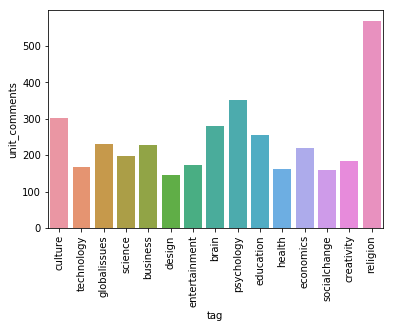

In [111]:
top15 = sns.barplot(x=units_top15.index, y="unit_comments", data=units_top15)

top15.set_xticklabels(units_top15.index,rotation=90)

top15

## 2b. Visualizing the distribution of views accross categories

There will be no explanation of the steps taken, since they are exactly the same as in 2a. The only difference is that now, instead of using comments, we will be using views.

In [113]:
ted_tags.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,comments
0,children,creativity,culture,dance,education,parenting,teaching,None,None,None,...,None,None,None,None,None,None,None,None,None,4553
1,alternativeenergy,cars,climatechange,culture,environment,globalissues,science,sustainability,technology,None,...,None,None,None,None,None,None,None,None,None,265
2,computers,entertainment,interfacedesign,media,music,performance,simplicity,software,technology,None,...,None,None,None,None,None,None,None,None,None,124
3,MacArthurgrant,activism,business,cities,environment,green,inequality,politics,pollution,None,...,None,None,None,None,None,None,None,None,None,200
4,Africa,Asia,Google,demo,economics,globaldevelopment,globalissues,health,math,statistics,...,None,None,None,None,None,None,None,None,None,593


In [114]:
ted_tags["views"] = ted.views

In [115]:
ted_tags.drop("comments", axis=1, inplace=True)

In [118]:
df_2 = categories_beacon(ted_tags, "views")

In [119]:
df_2.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,children_47227110,creativity_47227110,culture_47227110,dance_47227110,education_47227110,parenting_47227110,teaching_47227110,None_47227110,None_47227110,None_47227110,...,None_47227110,None_47227110,None_47227110,None_47227110,None_47227110,None_47227110,None_47227110,None_47227110,None_47227110,None_47227110
1,alternativeenergy_3200520,cars_3200520,climatechange_3200520,culture_3200520,environment_3200520,globalissues_3200520,science_3200520,sustainability_3200520,technology_3200520,None_3200520,...,None_3200520,None_3200520,None_3200520,None_3200520,None_3200520,None_3200520,None_3200520,None_3200520,None_3200520,None_3200520
2,computers_1636292,entertainment_1636292,interfacedesign_1636292,media_1636292,music_1636292,performance_1636292,simplicity_1636292,software_1636292,technology_1636292,None_1636292,...,None_1636292,None_1636292,None_1636292,None_1636292,None_1636292,None_1636292,None_1636292,None_1636292,None_1636292,None_1636292
3,MacArthurgrant_1697550,activism_1697550,business_1697550,cities_1697550,environment_1697550,green_1697550,inequality_1697550,politics_1697550,pollution_1697550,None_1697550,...,None_1697550,None_1697550,None_1697550,None_1697550,None_1697550,None_1697550,None_1697550,None_1697550,None_1697550,None_1697550
4,Africa_12005869,Asia_12005869,Google_12005869,demo_12005869,economics_12005869,globaldevelopment_12005869,globalissues_12005869,health_12005869,math_12005869,statistics_12005869,...,None_12005869,None_12005869,None_12005869,None_12005869,None_12005869,None_12005869,None_12005869,None_12005869,None_12005869,None_12005869


In [120]:
df2 = df_2.melt()

In [121]:
df2 = df2.value.str.split("_", expand=True)

In [125]:
df2.head()

,tag,views
0,children,47227110
1,alternativeenergy,3200520
2,computers,1636292
3,MacArthurgrant,1697550
4,Africa,12005869


In [124]:
df2 = df2.rename(columns={0:'tag', 1:'views'})

In [126]:
df2.shape

(81600, 2)

In [127]:
df2['views'] = df2['views'].astype(int)

In [128]:
df2.dtypes

tag      object
views     int64
dtype: object

In [129]:
top15_v = df2.groupby("tag")["views"].sum().sort_values(ascending=False).to_frame()

In [130]:
top15_v.head(15)

,views
tag,
None,107236284623
culture,1118911229
technology,1052207570
science,895385095
business,736918304
TEDx,707863450
globalissues,633308445
entertainment,577418592
design,562761156


In [131]:
total_v = df2.groupby("tag")["views"].transform(sum)

In [132]:
df2["total"] = total_v

In [133]:
df2.head()

,tag,views,total
0,children,47227110,272656241
1,alternativeenergy,3200520,42407668
2,computers,1636292,158465357
3,MacArthurgrant,1697550,12529134
4,Africa,12005869,116146365


In [134]:
units_v = df2.groupby("tag").agg({"views":"sum", "tag":"count"})

In [135]:
units_v.drop(["None"], inplace=True)

In [136]:
units_v = units_v.rename(columns={"views":"number_views", "tag":"number_talks"})

In [137]:
units_v["unit_views"] = (units_v["number_views"] / units_v["number_talks"])

In [138]:
units_v = units_v[units_v["number_talks"]>=5]

#### We are aiming to drop all those vague categories that start with "TED". In order to get that we first need to convert "tag" into a normal column

In [154]:
units_v.reset_index(level=0, inplace=True)

#### This statement below allows to exclude the categories starting by TED

In [157]:
units_v = units_v[~units_v["tag"].str.startswith("TED")]

#### Setting the index back as it was before, that is, making use of "tag"

In [161]:
units_v.set_index("tag", inplace=True)

#### We keep moving by obtaining the most viewed categories per talk

In [162]:
units_v.sort_values(by="unit_views", ascending=False).style.format({"number_views":"{:,}",
                                                                    "unit_views":"{:,.0f}"})

,number_views,number_talks,unit_views
tag,,,
bodylanguage,"87,928,006",11,"7,993,455"
success,"180,727,585",28,"6,454,557"
introvert,"31,519,878",5,"6,303,976"
mindfulness,"21,679,383",5,"4,335,877"
dance,"103,067,929",25,"4,122,717"
productivity,"80,965,267",20,"4,048,263"
Addiction,"20,169,651",5,"4,033,930"
magic,"72,390,493",18,"4,021,694"
time,"66,195,936",17,"3,893,879"


As we can see above the talk categories that are the most viewed on average are: body language followed by success, introversion, mindfulness and dance. On the contrary, the categories that are the least viewed are "charterforcompassion", followed by oil, guitar, singer and nonviolence

#### Plots for the top 15 in views

In [163]:
units_top15_v = units_v.sort_values(by="number_views", ascending=False).head(15)

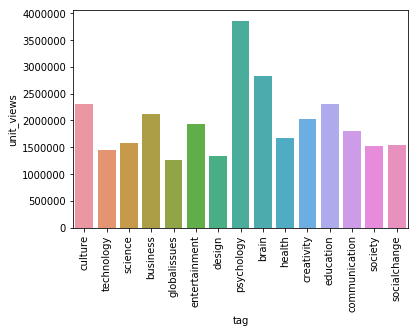

In [164]:
top15_v = sns.barplot(x=units_top15_v.index, y="unit_views", data=units_top15_v)

top15_v.set_xticklabels(units_top15_v.index,rotation=90)

top15_v

## 3. Distribution of talks per year

In [48]:
ted.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [49]:
ted.event.nunique()

355

In [50]:
ted.event.value_counts()

TED2014                     84
TED2009                     83
TED2016                     77
TED2013                     77
TED2015                     75
TED2011                     70
TEDGlobal 2012              70
TEDGlobal 2011              68
TED2007                     68
TED2010                     68
TED2017                     67
TEDGlobal 2013              66
TEDGlobal 2009              65
TED2012                     65
TED2008                     57
TEDGlobal 2010              55
TEDGlobal 2014              51
TED2006                     45
TED2005                     37
TEDIndia 2009               35
TEDSummit                   34
TED2003                     34
TEDWomen 2010               34
TED2004                     31
TEDWomen 2015               28
TED2002                     28
TEDGlobal 2007              27
TEDGlobal 2005              26
TEDWomen 2016               25
TEDxBeaconStreet            22
                            ..
TEDxVirginiaTech             1
LIFT 200

This above hints us 2 things. There seems to be a number of events that are not purely TED talks, and that column event is not the right one to extract the year.

It is published date that stores the date in unix timestamp format

In [51]:
ted["datetime"] = pd.to_datetime(ted.film_date, unit="s")

In [52]:
ted["year"] = ted.datetime.dt.year

Taking a sample to have a quick glimpse on the datetime conversion. Does it match with the event year (TEDYYYY)?

In [53]:
ted[["year", "event"]].sample(20)

,year,event
492,2009,TEDGlobal 2009
1287,2012,TED2012
94,2003,TED2003
1593,2013,TEDGlobal 2013
468,2009,TED2009
470,2009,TEDxUSC
1834,2014,TEDSalon Berlin 2014
558,2009,TEDIndia 2009
2027,2015,TEDWomen 2015
67,2003,TED2003


In [54]:
ted.isna().sum()

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    6
tags                  0
title                 0
url                   0
views                 0
datetime              0
year                  0
dtype: int64

In [55]:
talks_by_year = ted.groupby("year")["title"].count().sort_index().to_frame()

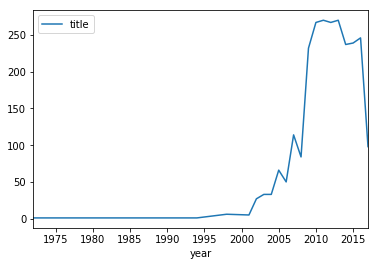

In [56]:
talks_by_year.plot()

The trend is clearly ascending. TED talks have been growing over the years since they first started although they seem to have reached a peak between 2011 and 2013.

In [77]:
talks_by_year.sort_values(by="title",ascending=False).head(5)

,title
year,
2013,269
2012,267
2011,264
2016,245
2014,237


There are 2 things that stand out though. 1 is that TED talks were not taking place as far back as 1973 so maybe we would be better trying to identify non TED talks to leave them out. And, 2017 drop is fishy, is it maybe that 2017 is ongoing in the moment this data was collected?

#### Identifying pseudo TED talks

In [57]:
ted.shape

(2550, 19)

In [80]:
ted = ted[ted["event"].str.startswith("TED", "ted")]

In [81]:
ted.shape

(2439, 19)

In [82]:
talks_by_year = ted.groupby("year")["title"].count().sort_index().to_frame()

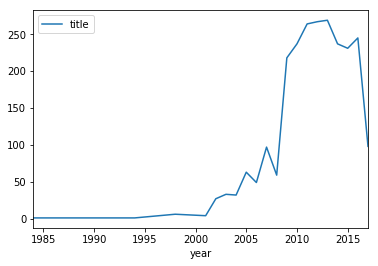

In [83]:
talks_by_year.plot()

This makes more sense now, TED talks started back in 1985

#### Checking what happened in 2017

In [84]:
ted[ted.year == 2017].datetime.dt.month.sort_values(ascending=False)

2544    8
2542    8
2539    8
2535    8
2536    7
2548    7
2540    7
2506    7
2545    6
2479    4
2470    4
2471    4
2472    4
2473    4
2477    4
2478    4
2549    4
2482    4
2483    4
2464    4
2484    4
2485    4
2488    4
2489    4
2467    4
2456    4
2462    4
2460    4
2438    4
2439    4
       ..
2509    4
2497    4
2508    4
2507    4
2505    4
2498    4
2503    4
2502    4
2499    4
2466    3
2425    3
2421    3
2480    3
2501    3
2476    3
2468    3
2431    3
2413    2
2398    2
2427    2
2387    2
2514    2
2433    2
2436    2
2541    2
2444    2
2457    2
2428    1
2394    1
2384    1
Name: datetime, Length: 98, dtype: int64

As we suspected, from last talk dates of august. It seems this dataset was collected (or stopped storing records) in the summer of 2017.

## 4. Year of the most popular talks

In [92]:
(ted.groupby("year")["views"].mean().sort_values(ascending=False).to_frame()
.style.format({"views":"{:,.0f}"})
) 

,views
year,
2006,"3,096,594"
2004,"2,630,471"
2013,"2,183,377"
2008,"1,982,835"
2015,"1,946,755"
2012,"1,832,994"
2001,"1,774,926"
2014,"1,770,629"
2009,"1,749,031"


## 5. Most popular events

In [109]:
(ted.groupby("event")["views"].sum().sort_values(ascending=False).to_frame().head(10)
.style.format({"views":"{:,.0f}"})
)

,views
event,
TED2013,"177,307,937"
TED2014,"174,121,423"
TEDGlobal 2013,"170,554,736"
TED2015,"150,826,305"
TED2006,"147,345,533"
TED2009,"145,656,385"
TEDGlobal 2012,"145,070,549"
TED2012,"144,497,608"
TED2016,"139,571,905"


## 6. Best rated TED talks

In [120]:
ted.ratings[0]

"[{'id': 7, 'name': 'Funny', 'count': 19645}, {'id': 1, 'name': 'Beautiful', 'count': 4573}, {'id': 9, 'name': 'Ingenious', 'count': 6073}, {'id': 3, 'name': 'Courageous', 'count': 3253}, {'id': 11, 'name': 'Longwinded', 'count': 387}, {'id': 2, 'name': 'Confusing', 'count': 242}, {'id': 8, 'name': 'Informative', 'count': 7346}, {'id': 22, 'name': 'Fascinating', 'count': 10581}, {'id': 21, 'name': 'Unconvincing', 'count': 300}, {'id': 24, 'name': 'Persuasive', 'count': 10704}, {'id': 23, 'name': 'Jaw-dropping', 'count': 4439}, {'id': 25, 'name': 'OK', 'count': 1174}, {'id': 26, 'name': 'Obnoxious', 'count': 209}, {'id': 10, 'name': 'Inspiring', 'count': 24924}]"

In [121]:
type(ted.ratings[0])

str

This above is a stringified list of dictionaries. In order to make it more manageable, we want to convert it to a list of dictionaries.

#### Converting to a list of dictionaries instead

In [125]:
ted["ratings_list"] = ted.ratings.apply(ast.literal_eval)

By calling the Abstract Sintax Tree module and its method literal eval, we evaluate a string that contains a container (in this case a list of dictionaries), and it converts it into the evaluated type, in this case, a list.

By the way, no need of applying a lambda function.

In [130]:
type(ted.ratings_list[0])

list

In [127]:
ted.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,datetime,year,ratings_list
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,2006-02-25,2006,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {..."
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,2006-02-25,2006,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i..."
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,2006-02-24,2006,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i..."
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550,2006-02-26,2006,"[{'id': 3, 'name': 'Courageous', 'count': 760}..."
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,2006-02-22,2006,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}..."


In [128]:
ted.dtypes

comments                       int64
description                   object
duration                       int64
event                         object
film_date                      int64
languages                      int64
main_speaker                  object
name                          object
num_speaker                    int64
published_date                 int64
ratings                       object
related_talks                 object
speaker_occupation            object
tags                          object
title                         object
url                           object
views                          int64
datetime              datetime64[ns]
year                           int64
ratings_list                  object
dtype: object

Beware that both ratings and ratings_list are object types. However as we have pointed out before, they are different inside

In [129]:
ted.ratings_list[0]

[{'id': 7, 'name': 'Funny', 'count': 19645},
 {'id': 1, 'name': 'Beautiful', 'count': 4573},
 {'id': 9, 'name': 'Ingenious', 'count': 6073},
 {'id': 3, 'name': 'Courageous', 'count': 3253},
 {'id': 11, 'name': 'Longwinded', 'count': 387},
 {'id': 2, 'name': 'Confusing', 'count': 242},
 {'id': 8, 'name': 'Informative', 'count': 7346},
 {'id': 22, 'name': 'Fascinating', 'count': 10581},
 {'id': 21, 'name': 'Unconvincing', 'count': 300},
 {'id': 24, 'name': 'Persuasive', 'count': 10704},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 4439},
 {'id': 25, 'name': 'OK', 'count': 1174},
 {'id': 26, 'name': 'Obnoxious', 'count': 209},
 {'id': 10, 'name': 'Inspiring', 'count': 24924}]

No quotes here indicating a string

#### Counting the number of ratings per talk

In [158]:
def dict_count_digger(list_of_dicts):
    num = 0
    for elem in list_of_dicts:
        num += elem["count"]
    return num

In [159]:
ted["ratings_num"] = ted.ratings_list.apply(dict_count_digger)

In [160]:
ted.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,...,related_talks,speaker_occupation,tags,title,url,views,datetime,year,ratings_list,ratings_num
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,...,"[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,2006-02-25,2006,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...",93850
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,...,"[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,2006-02-25,2006,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...",2936
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,...,"[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,2006-02-24,2006,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...",2824
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,...,"[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550,2006-02-26,2006,"[{'id': 3, 'name': 'Courageous', 'count': 760}...",3728
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,...,"[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,2006-02-22,2006,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...",25620


## 7. Which occupations delivered the funniest talks on average?

In [161]:
def dict_count_digger_2(list_of_dicts):
    for elem in list_of_dicts:
        if elem["name"] == "Funny":
            return elem["count"]

In [162]:
ted["funny_ratings"] = ted.ratings_list.apply(dict_count_digger_2)

In [170]:
ted["funny_rate"] = ted.funny_ratings / ted.ratings_num

In [171]:
(ted.groupby("speaker_occupation")["funny_rate"].mean().sort_values(ascending=False).to_frame()
.style.format({"funny_ratings":"{:,.0f}"})
)

,funny_rate
speaker_occupation,
Comedian and writer,0.602085
Jugglers,0.566828
"Actor, comedian, playwright",0.558107
"Actor, writer",0.515152
Comedian,0.512457
Satirist,0.512383
Cartoon editor,0.511628
"Comedian, voice artist",0.503542
Ornithologist,0.502935


#### Just checking the funniest speaker

In [181]:
ted.sort_values("funny_rate").main_speaker.tail()

2114     James Veitch
173       Yossi Vardi
747       Maz Jobrani
1398      Maz Jobrani
685     Julia Sweeney
Name: main_speaker, dtype: object